# <font color=black> Analysis - ICA vs iCAP in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different methods and datasets.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_
    * Analysis of spatial similarity (for a single K, or across multiple Ks)
    * Distribution across axial subdvisions (D,V,L,R) for different Ks

In [58]:
import sys,json

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from plotting import Plotting
from spine_only_analysis import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<hr style="border:1px solid black">

# Initialization

### Load configuration file 

In [59]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_NK.json') as config_file:
    config = json.load(config_file)

<hr style="border:1px solid black">

# Figure 2 – Robustness (across methods)

## `GVA` dataset

### Qualitative evaluation

In [60]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_robustness_gva_ica = {'k':5, 'dataset':'gva', 'analysis':'ica'}
params_qual_robustness_gva_icap = {'k':5, 'dataset':'gva', 'analysis':'icap'}

plotting_robustness_gva = Plotting(config,'spinalcord',params1=params_qual_robustness_gva_ica,params2=params_qual_robustness_gva_icap)

/media/miplab-nas2/Data3/BMPD/hc_project//spine_only/gva/ica//K_5/comp_zscored/*4D*
/media/miplab-nas2/Data3/BMPD/hc_project//spine_only/gva/icap//K_5/comp_zscored/*iCAPs*


In [61]:
plotting_robustness_gva.sc_plot(show_spinal_levels=False, k_per_line=5, lthresh=2, uthresh=4, save_results=True, similarity_method='Dice', centering_method='middle', template=config['main_dir']+'/templates/PAM50_hc_project/template/T2w_mtl_group_mean_resampled.nii.gz')

The plotting will be display in neurological orientation (Left > Right)
COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


FileNotFoundError: No such file or no access: '/media/miplab-nas2/Data3/BMPD/hc_project//templates/PAM50/template/T2w_mtl_group_mean_resampled.nii.gz'

_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

### Quantitative evaluation

In [5]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_robustness_gva_ica = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'ica'}
params_quant_robustness_gva_icap = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'icap'}

spine_analysis_robustness_gva = SpineOnlyAnalysis(config,params1=params_quant_robustness_gva_ica,params2=params_quant_robustness_gva_icap)

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 5 vs gva_icap at K = 5 

The mean similarity is 0.28


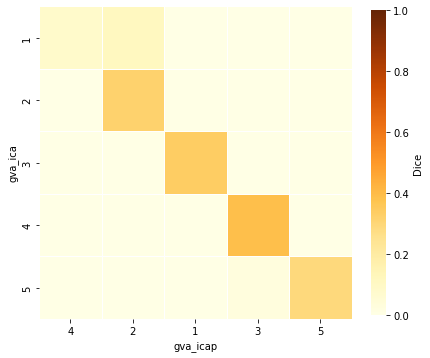

In [7]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_robustness_gva.spatial_similarity(k1=5,similarity_method='Dice',save_figure=True)

## `MTL` dataset

### Qualitative evaluation

In [8]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_robustness_mtl_ica = {'k':9, 'dataset':'mtl', 'analysis':'ica'}
params_qual_robustness_mtl_icap = {'k':9, 'dataset':'mtl', 'analysis':'icap'}

plotting_robustness_mtl = Plotting(config,'spinalcord',params1=params_qual_robustness_mtl_ica,params2=params_qual_robustness_mtl_icap)

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


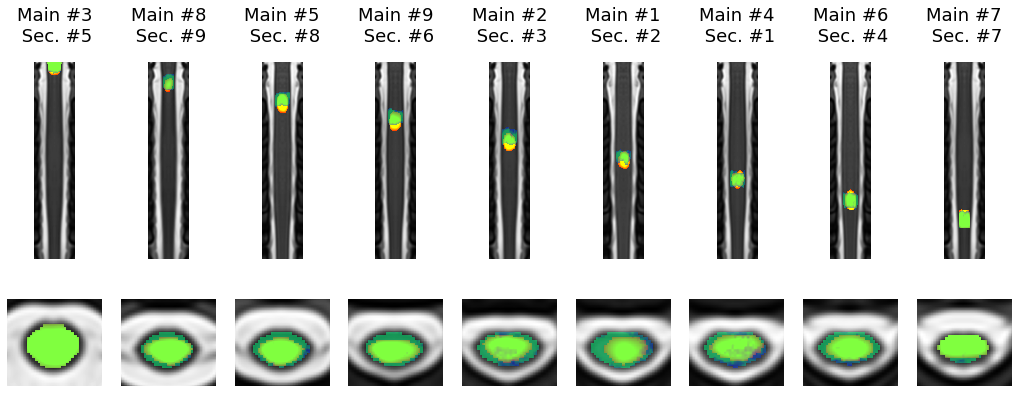

In [10]:
plotting_robustness_mtl.sc_plot(show_spinal_levels=False, k_per_line=9, lthresh=2, uthresh=4, save_results=True, similarity_method='Dice', centering_method='middle')

_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

### Quantitative evaluation

In [11]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_robustness_mtl_ica = {'k_range':range(9,10), 'dataset':'mtl', 'analysis':'ica'}
params_quant_robustness_mtl_icap = {'k_range':range(9,10), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_robustness_mtl = SpineOnlyAnalysis(config,params1=params_quant_robustness_mtl_ica,params2=params_quant_robustness_mtl_icap)

METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 9 vs mtl_icap at K = 9 

The mean similarity is 0.69


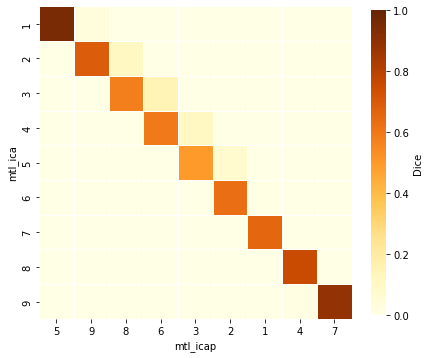

In [12]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_robustness_mtl.spatial_similarity(k1=9,similarity_method='Dice',save_figure=True)

<hr style="border:1px solid black">

# Figure 3 – Replicability (across datasets)

## `ICA` method

### Qualitative evaluation

In [23]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_replic_ica_gva = {'k':5, 'dataset':'gva', 'analysis':'ica'}
params_qual_replic_ica_mtl = {'k':9, 'dataset':'mtl', 'analysis':'ica'}

plotting_replicability_ica = Plotting(config,'spinalcord',params1=params_qual_replic_ica_gva,params2=params_qual_replic_ica_mtl)

/media/miplab-nas2/Data3/BMPD/hc_project//spine_only/gva/ica//K_5/comp_zscored/*4D*
/media/miplab-nas2/Data3/BMPD/hc_project//spine_only/mtl/spinalcord//K_9/comp_zscored/*4D*


The plotting will be display in flip orientation (Right > left)
COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


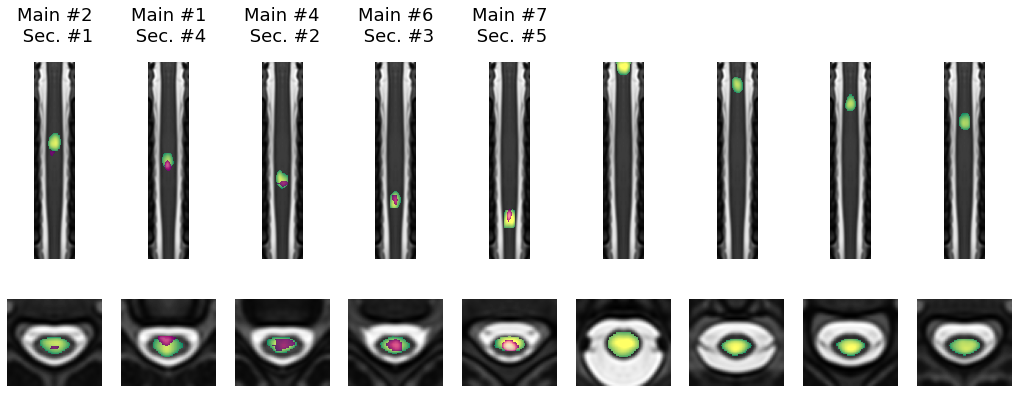

In [51]:
plotting_replicability_ica.sc_plot(show_spinal_levels=False, k_per_line=9, lthresh=2, uthresh=4, save_results=True, colormap_two=['summer','RdPu_r'], similarity_method='Dice', centering_method='middle')

_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

### Quantitative evaluation

In [15]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_replicability_ica_gva = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'ica'}
params_quant_replicability_ica_mtl = {'k_range':range(9,10), 'dataset':'mtl', 'analysis':'ica'}

spine_analysis_replicability_ica = SpineOnlyAnalysis(config,params1=params_quant_replicability_ica_gva,params2=params_quant_replicability_ica_mtl)

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 5 vs mtl_ica at K = 9 

The mean similarity is 0.32


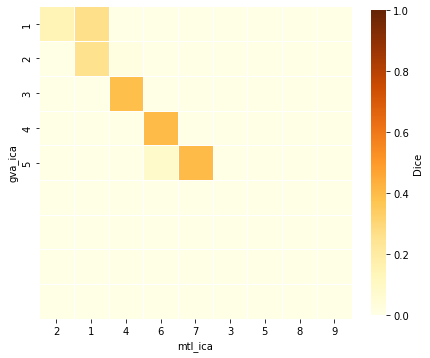

In [16]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_replicability_ica.spatial_similarity(k1=5,k2=9,similarity_method='Dice',save_figure=True)

## `iCAP` method

### Qualitative evaluation

In [17]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_replic_icap_gva = {'k':5, 'dataset':'gva', 'analysis':'icap'}
params_qual_replic_icap_mtl = {'k':9, 'dataset':'mtl', 'analysis':'icap'}

plotting_replicability_icap = Plotting(config,'spinalcord',params1=params_qual_replic_icap_gva,params2=params_qual_replic_icap_mtl)

The plotting will be display in flip orientation (Right > left)
COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


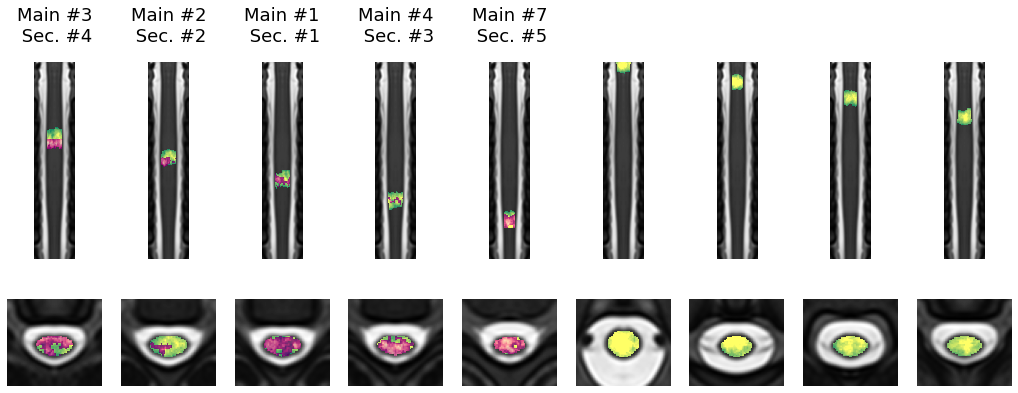

In [48]:
plotting_replicability_icap.sc_plot(show_spinal_levels=False, k_per_line=9, lthresh=2, uthresh=4, save_results=True, colormap_two=['summer','RdPu_r'], similarity_method='Dice', centering_method='middle')

_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

### Quantitative evaluation

In [19]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_replicability_icap_gva = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'icap'}
params_quant_replicability_icap_mtl = {'k_range':range(9,10), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_replicability_icap = SpineOnlyAnalysis(config,params1=params_quant_replicability_icap_gva,params2=params_quant_replicability_icap_mtl)

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 5 vs mtl_icap at K = 9 

The mean similarity is 0.65


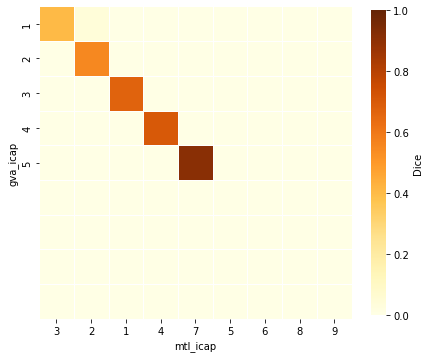

In [20]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_replicability_icap.spatial_similarity(k1=5,k2=9,similarity_method='Dice',save_figure=True)